<a href="https://colab.research.google.com/github/ariffinsarhid/Capstone/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Cleaning
In this notebook, I will do some data cleaning which includes the following:
- I will import the dataset and clean the data.
- I will convert the names in lowercase.
- Replace any spaces with an underscore. 
- Deal with missing data. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore')
import io

In [2]:
url_1 = 'https://raw.githubusercontent.com/ariffinsarhid/Predicting-Airline-On-Time-Performance-In-Progress-/main/Delay_table.csv'
url_2 = 'https://raw.githubusercontent.com/ariffinsarhid/Predicting-Airline-On-Time-Performance-In-Progress-/main/airline_list.csv'
df = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)

In [3]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2019,2,6,11,2,11/06/19,9E,20363,9E,3459,...,60.0,35.0,1,192,1,0.0,0.0,0.0,0.0,214.0
1,2018,1,2,8,4,08/02/18,WN,19393,WN,5932,...,153.0,114.0,1,793,4,0.0,0.0,13.0,0.0,16.0
2,2020,1,3,24,2,24/03/20,YV,20378,YV,5825,...,75.0,62.0,1,355,2,44.0,0.0,0.0,0.0,0.0
3,2019,3,9,2,1,02/09/19,YX,20452,YX,6104,...,169.0,149.0,1,1010,5,NaN,NaN,NaN,NaN,NaN
4,2019,1,3,27,3,27/03/19,OH,20397,OH,5125,...,77.0,52.0,1,245,1,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89009 entries, 0 to 89008
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             89009 non-null  int64  
 1   Quarter                          89009 non-null  int64  
 2   Month                            89009 non-null  int64  
 3   DayofMonth                       89009 non-null  int64  
 4   DayOfWeek                        89009 non-null  int64  
 5   FlightDate                       89009 non-null  object 
 6   Reporting_Airline                89009 non-null  object 
 7   DOT_ID_Reporting_Airline         89009 non-null  int64  
 8   IATA_CODE_Reporting_Airline      89009 non-null  object 
 9   Flight_Number_Reporting_Airline  89009 non-null  int64  
 10  OriginAirportID                  89009 non-null  int64  
 11  OriginAirportSeqID               89009 non-null  int64  
 12  OriginCityMarketID

In [5]:
df['Reporting_Airline'].unique()

array(['9E', 'WN', 'YV', 'YX', 'OH', 'UA', 'DL', 'OO', 'AA', 'NK', 'AS',
       'B6', 'G4', 'F9', 'HA', 'MQ', 'EV', 'VX'], dtype=object)

In [6]:
df2.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1691 non-null   object
 1   Description  1692 non-null   object
dtypes: object(2)
memory usage: 26.6+ KB


In [8]:
df.shape

(89009, 55)

In [9]:
### We want to see the description of the airline on df instead of the airline code.
df = pd.merge(left = df,
              right = df2,
              left_on = "IATA_CODE_Reporting_Airline",
              right_on = "Code")

In [10]:
df.shape

(89009, 57)

In [11]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Code,Description
0,2019,2,6,11,2,11/06/19,9E,20363,9E,3459,...,1,192,1,0.0,0.0,0.0,0.0,214.0,9E,Endeavor Air Inc.
1,2018,2,4,10,2,10/04/18,9E,20363,9E,5198,...,1,780,4,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.
2,2019,4,10,1,2,01/10/19,9E,20363,9E,3358,...,1,544,3,4.0,0.0,0.0,0.0,11.0,9E,Endeavor Air Inc.
3,2018,3,7,27,5,27/07/18,9E,20363,9E,5388,...,1,255,2,0.0,0.0,94.0,0.0,18.0,9E,Endeavor Air Inc.
4,2019,1,3,4,1,04/03/19,9E,20363,9E,5179,...,1,340,2,0.0,27.0,3.0,0.0,0.0,9E,Endeavor Air Inc.


In [12]:
df = df.rename(columns = {"Description":"Airline"})
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Code,Airline
0,2019,2,6,11,2,11/06/19,9E,20363,9E,3459,...,1,192,1,0.0,0.0,0.0,0.0,214.0,9E,Endeavor Air Inc.
1,2018,2,4,10,2,10/04/18,9E,20363,9E,5198,...,1,780,4,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.
2,2019,4,10,1,2,01/10/19,9E,20363,9E,3358,...,1,544,3,4.0,0.0,0.0,0.0,11.0,9E,Endeavor Air Inc.
3,2018,3,7,27,5,27/07/18,9E,20363,9E,5388,...,1,255,2,0.0,0.0,94.0,0.0,18.0,9E,Endeavor Air Inc.
4,2019,1,3,4,1,04/03/19,9E,20363,9E,5179,...,1,340,2,0.0,27.0,3.0,0.0,0.0,9E,Endeavor Air Inc.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89009 entries, 0 to 89008
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             89009 non-null  int64  
 1   Quarter                          89009 non-null  int64  
 2   Month                            89009 non-null  int64  
 3   DayofMonth                       89009 non-null  int64  
 4   DayOfWeek                        89009 non-null  int64  
 5   FlightDate                       89009 non-null  object 
 6   Reporting_Airline                89009 non-null  object 
 7   DOT_ID_Reporting_Airline         89009 non-null  int64  
 8   IATA_CODE_Reporting_Airline      89009 non-null  object 
 9   Flight_Number_Reporting_Airline  89009 non-null  int64  
 10  OriginAirportID                  89009 non-null  int64  
 11  OriginAirportSeqID               89009 non-null  int64  
 12  OriginCityMarketID

In [14]:
df['Airline'].unique()

array(['Endeavor Air Inc.', 'Southwest Airlines Co.',
       'Mesa Airlines Inc.', 'Republic Airline', 'PSA Airlines Inc.',
       'United Air Lines Inc.', 'Delta Air Lines Inc.',
       'SkyWest Airlines Inc.', 'American Airlines Inc.',
       'Spirit Air Lines', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Allegiant Air', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'ExpressJet Airlines LLC',
       'Virgin America'], dtype=object)

In [15]:
df.shape ## The data has 169696 rows with 109 columns.

(89009, 57)

In [16]:
df[['OriginCity', 'OriginState']] = df['OriginCityName'].str.split(",", expand = True)
df[['DestCity', 'DestState']] = df['DestCityName'].str.split("," , expand = True)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Code,Airline,OriginCity,DestCity
0,2019,2,6,11,2,11/06/19,9E,20363,9E,3459,...,1,0.0,0.0,0.0,0.0,214.0,9E,Endeavor Air Inc.,Atlanta,Columbia
1,2018,2,4,10,2,10/04/18,9E,20363,9E,5198,...,4,NaN,NaN,NaN,NaN,NaN,9E,Endeavor Air Inc.,Atlanta,White Plains
2,2019,4,10,1,2,01/10/19,9E,20363,9E,3358,...,3,4.0,0.0,0.0,0.0,11.0,9E,Endeavor Air Inc.,New York,Charlotte
3,2018,3,7,27,5,27/07/18,9E,20363,9E,5388,...,2,0.0,0.0,94.0,0.0,18.0,9E,Endeavor Air Inc.,Baltimore,Raleigh/Durham
4,2019,1,3,4,1,04/03/19,9E,20363,9E,5179,...,2,0.0,27.0,3.0,0.0,0.0,9E,Endeavor Air Inc.,Pittsburgh,New York


In [17]:
df = df.drop(columns = ['Code', 'ArrTimeBlk', 'Reporting_Airline', 'Origin', 'Dest', 'OriginState', 'DestState',
                        'OriginCityName', 'DestCityName'])

In [18]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline,OriginCity,DestCity
0,2019,2,6,11,2,11/06/19,20363,9E,3459,10397,...,192,1,0.0,0.0,0.0,0.0,214.0,Endeavor Air Inc.,Atlanta,Columbia
1,2018,2,4,10,2,10/04/18,20363,9E,5198,10397,...,780,4,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Atlanta,White Plains
2,2019,4,10,1,2,01/10/19,20363,9E,3358,12953,...,544,3,4.0,0.0,0.0,0.0,11.0,Endeavor Air Inc.,New York,Charlotte
3,2018,3,7,27,5,27/07/18,20363,9E,5388,10821,...,255,2,0.0,0.0,94.0,0.0,18.0,Endeavor Air Inc.,Baltimore,Raleigh/Durham
4,2019,1,3,4,1,04/03/19,20363,9E,5179,14122,...,340,2,0.0,27.0,3.0,0.0,0.0,Endeavor Air Inc.,Pittsburgh,New York


#### Clean the columns

In [19]:
def clean_column(df):
    df.columns = df.columns.str.replace(' ', '_')
    df.columns = df.columns.str.lower()
    
    return df

In [20]:
clean_column(df)

,year,quarter,month,dayofmonth,dayofweek,flightdate,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,...,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,airline,origincity,destcity
0,2019,2,6,11,2,11/06/19,20363,9E,3459,10397,...,192,1,0.0,0.0,0.0,0.0,214.0,Endeavor Air Inc.,Atlanta,Columbia
1,2018,2,4,10,2,10/04/18,20363,9E,5198,10397,...,780,4,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Atlanta,White Plains
2,2019,4,10,1,2,01/10/19,20363,9E,3358,12953,...,544,3,4.0,0.0,0.0,0.0,11.0,Endeavor Air Inc.,New York,Charlotte
3,2018,3,7,27,5,27/07/18,20363,9E,5388,10821,...,255,2,0.0,0.0,94.0,0.0,18.0,Endeavor Air Inc.,Baltimore,Raleigh/Durham
4,2019,1,3,4,1,04/03/19,20363,9E,5179,14122,...,340,2,0.0,27.0,3.0,0.0,0.0,Endeavor Air Inc.,Pittsburgh,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89004,2018,1,1,17,3,17/01/18,21171,VX,1260,12889,...,2248,9,NaN,NaN,NaN,NaN,NaN,Virgin America,Las Vegas,New York
89005,2018,1,2,19,1,19/02/18,21171,VX,1977,14679,...,447,2,NaN,NaN,NaN,NaN,NaN,Virgin America,San Diego,San Francisco
89006,2018,1,2,6,2,06/02/18,21171,VX,1914,14771,...,414,2,NaN,NaN,NaN,NaN,NaN,Virgin America,San Francisco,Las Vegas
89007,2018,1,3,10,6,10/03/18,21171,VX,1057,12892,...,2556,11,0.0,0.0,28.0,0.0,0.0,Virgin America,Los Angeles,Honolulu


#### Checking for null values

Text(0.5, 1.0, 'Missing value in the dataset')

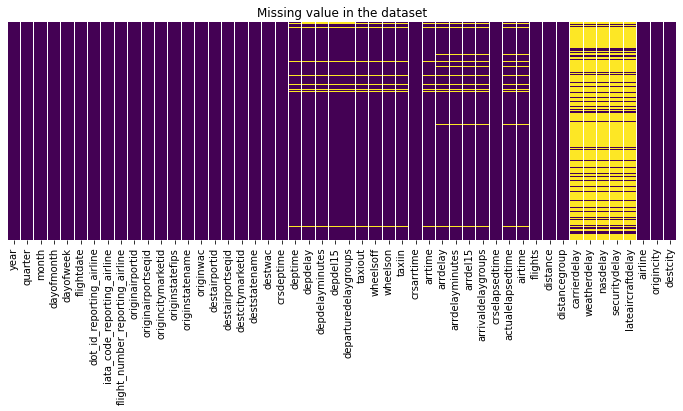

In [21]:
plt.figure(figsize = (12,4))
sns.heatmap(df.isnull(),cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing value in the dataset')

#### There seems to be a lot of missing values for columns 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'. According to the data dictionary, these columns are in numerical which shows the cause of delay in minutes. Therefore, it make sense that there won't be any input in the column if the flight was on time. However, for the purpose of cleaning the data, i will input numerical zero if the flight is on time. 

In [22]:
pd.options.display.max_rows = 55
df.isnull().sum()

year                                   0
quarter                                0
month                                  0
dayofmonth                             0
dayofweek                              0
flightdate                             0
dot_id_reporting_airline               0
iata_code_reporting_airline            0
flight_number_reporting_airline        0
originairportid                        0
originairportseqid                     0
origincitymarketid                     0
originstatefips                        0
originstatename                        0
originwac                              0
destairportid                          0
destairportseqid                       0
destcitymarketid                       0
deststatename                          0
destwac                                0
crsdeptime                             0
deptime                             1937
depdelay                            1974
depdelayminutes                     1974
depdel15        

In [23]:
print("Percentage of null values in airtime:", ((2201/89009)*100))

Percentage of null values in airtime: 2.4727836510914627


#### Except for 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay', let's drop the missing rows

In [24]:
df.shape

(89009, 50)

In [25]:
df = df.dropna(subset= ['deptime', 'depdelay', 'depdelayminutes', 'depdel15',
                       'departuredelaygroups', 'taxiout', 'wheelsoff', 'wheelson', 'taxiin',
                       'arrtime','arrdelay', 'arrdelayminutes', 'arrdel15', 
                       'arrivaldelaygroups', 'crselapsedtime', 'actualelapsedtime', 'airtime'])

In [26]:
df.shape

(86761, 50)

In [27]:
df.isnull().sum()

year                                   0
quarter                                0
month                                  0
dayofmonth                             0
dayofweek                              0
flightdate                             0
dot_id_reporting_airline               0
iata_code_reporting_airline            0
flight_number_reporting_airline        0
originairportid                        0
originairportseqid                     0
origincitymarketid                     0
originstatefips                        0
originstatename                        0
originwac                              0
destairportid                          0
destairportseqid                       0
destcitymarketid                       0
deststatename                          0
destwac                                0
crsdeptime                             0
deptime                                0
depdelay                               0
depdelayminutes                        0
depdel15        

#### Now let's deal with the remaining missing columns

In [28]:
df[df.arrdel15.isin([1])]

,year,quarter,month,dayofmonth,dayofweek,flightdate,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,...,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,airline,origincity,destcity
0,2019,2,6,11,2,11/06/19,20363,9E,3459,10397,...,192,1,0.0,0.0,0.0,0.0,214.0,Endeavor Air Inc.,Atlanta,Columbia
2,2019,4,10,1,2,01/10/19,20363,9E,3358,12953,...,544,3,4.0,0.0,0.0,0.0,11.0,Endeavor Air Inc.,New York,Charlotte
3,2018,3,7,27,5,27/07/18,20363,9E,5388,10821,...,255,2,0.0,0.0,94.0,0.0,18.0,Endeavor Air Inc.,Baltimore,Raleigh/Durham
4,2019,1,3,4,1,04/03/19,20363,9E,5179,14122,...,340,2,0.0,27.0,3.0,0.0,0.0,Endeavor Air Inc.,Pittsburgh,New York
9,2018,3,7,22,7,22/07/18,20363,9E,5029,12953,...,258,2,71.0,0.0,0.0,0.0,0.0,Endeavor Air Inc.,New York,Burlington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88984,2018,1,1,2,2,02/01/18,21171,VX,1360,12892,...,2611,11,0.0,0.0,16.0,0.0,0.0,Virgin America,Los Angeles,Boston
88988,2018,1,3,22,4,22/03/18,21171,VX,1936,14771,...,337,2,0.0,0.0,43.0,0.0,0.0,Virgin America,San Francisco,Los Angeles
88992,2018,1,2,6,2,06/02/18,21171,VX,1874,12892,...,1246,5,19.0,0.0,0.0,0.0,0.0,Virgin America,Los Angeles,Dallas
88999,2018,1,2,16,5,16/02/18,21171,VX,1251,12889,...,414,2,162.0,0.0,0.0,0.0,0.0,Virgin America,Las Vegas,San Francisco


In [29]:
df.fillna(0, inplace = True)

In [30]:
df.head()

,year,quarter,month,dayofmonth,dayofweek,flightdate,dot_id_reporting_airline,iata_code_reporting_airline,flight_number_reporting_airline,originairportid,...,distance,distancegroup,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,airline,origincity,destcity
0,2019,2,6,11,2,11/06/19,20363,9E,3459,10397,...,192,1,0.0,0.0,0.0,0.0,214.0,Endeavor Air Inc.,Atlanta,Columbia
1,2018,2,4,10,2,10/04/18,20363,9E,5198,10397,...,780,4,0.0,0.0,0.0,0.0,0.0,Endeavor Air Inc.,Atlanta,White Plains
2,2019,4,10,1,2,01/10/19,20363,9E,3358,12953,...,544,3,4.0,0.0,0.0,0.0,11.0,Endeavor Air Inc.,New York,Charlotte
3,2018,3,7,27,5,27/07/18,20363,9E,5388,10821,...,255,2,0.0,0.0,94.0,0.0,18.0,Endeavor Air Inc.,Baltimore,Raleigh/Durham
4,2019,1,3,4,1,04/03/19,20363,9E,5179,14122,...,340,2,0.0,27.0,3.0,0.0,0.0,Endeavor Air Inc.,Pittsburgh,New York


Text(0.5, 1.0, 'Missing value in the dataset')

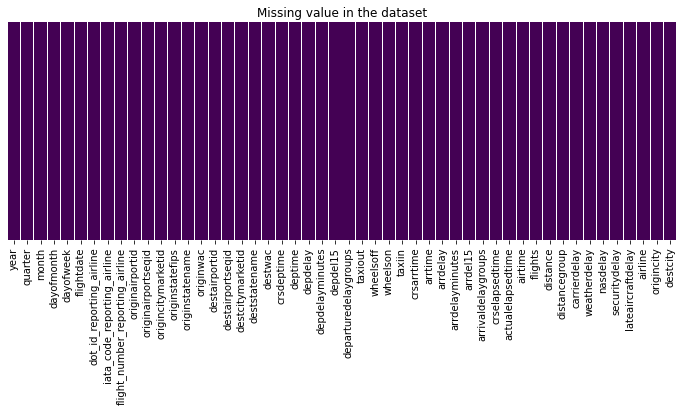

In [31]:
plt.figure(figsize = (12,4))
sns.heatmap(df.isnull(),cbar = False, cmap = 'viridis', yticklabels = False)
plt.title('Missing value in the dataset')

In [32]:
pd.options.display.max_rows = 81
df.dtypes

year                                 int64
quarter                              int64
month                                int64
dayofmonth                           int64
dayofweek                            int64
flightdate                          object
dot_id_reporting_airline             int64
iata_code_reporting_airline         object
flight_number_reporting_airline      int64
originairportid                      int64
originairportseqid                   int64
origincitymarketid                   int64
originstatefips                      int64
originstatename                     object
originwac                            int64
destairportid                        int64
destairportseqid                     int64
destcitymarketid                     int64
deststatename                       object
destwac                              int64
crsdeptime                           int64
deptime                            float64
depdelay                           float64
depdelaymin

In [33]:
#df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [34]:
df.to_csv('./data/final_table.csv', index = False)